In [27]:
import pandas as pd
import matplotlib.pyplot as plt

winter_data = pd.read_csv(r'C:\Users\yafetftw\CS577_Project\Data\Project_Data\Winter_Air.csv')
summer_data = pd.read_csv(r'C:\Users\yafetftw\CS577_Project\Data\Project_Data\Summer_Air.csv')

winter_data.head(), summer_data.head()


(   Unique ID  Indicator ID                    Name Measure Measure Info  \
 0     172607           375  Nitrogen dioxide (NO2)    Mean          ppb   
 1     172675           375  Nitrogen dioxide (NO2)    Mean          ppb   
 2     336723           375  Nitrogen dioxide (NO2)    Mean          ppb   
 3     741126           375  Nitrogen dioxide (NO2)    Mean          ppb   
 4     165858           375  Nitrogen dioxide (NO2)    Mean          ppb   
 
   Geo Type Name  Geo Join ID                    Geo Place Name  \
 0         UHF34       306308                   Chelsea-Village   
 1         UHF34       306308                   Chelsea-Village   
 2            CD          101          Financial District (CD1)   
 3            CD          101          Financial District (CD1)   
 4            CD          102  Greenwich Village and Soho (CD2)   
 
            Time Period  Start_Date  Data Value  Message  
 0  Annual Average 2009  12/01/2008       38.16      NaN  
 1  Annual Average 2

C:\Users\yafetftw\AppData\Local\Temp\ipykernel_15148\1637937060.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(winter_values, positions=[1], widths=0.6, patch_artist=True, labels=["Winter"])


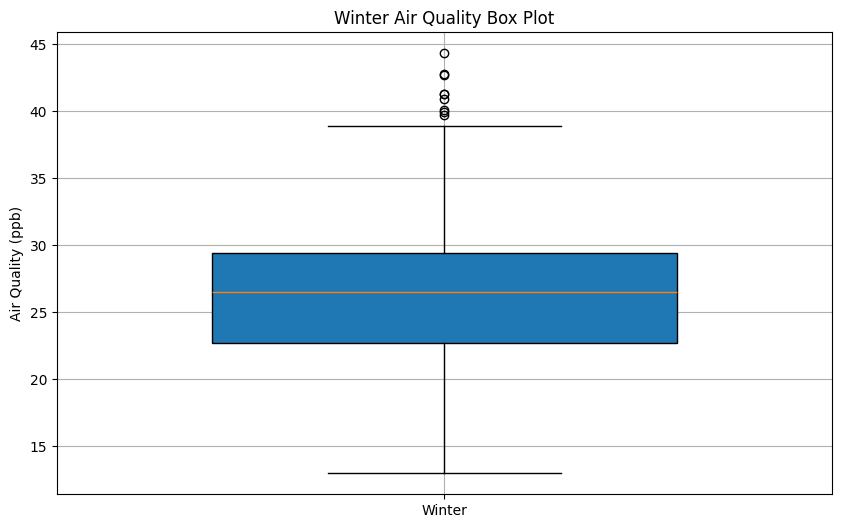

C:\Users\yafetftw\AppData\Local\Temp\ipykernel_15148\1637937060.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(summer_values, positions=[1], widths=0.6, patch_artist=True, labels=["Summer"])


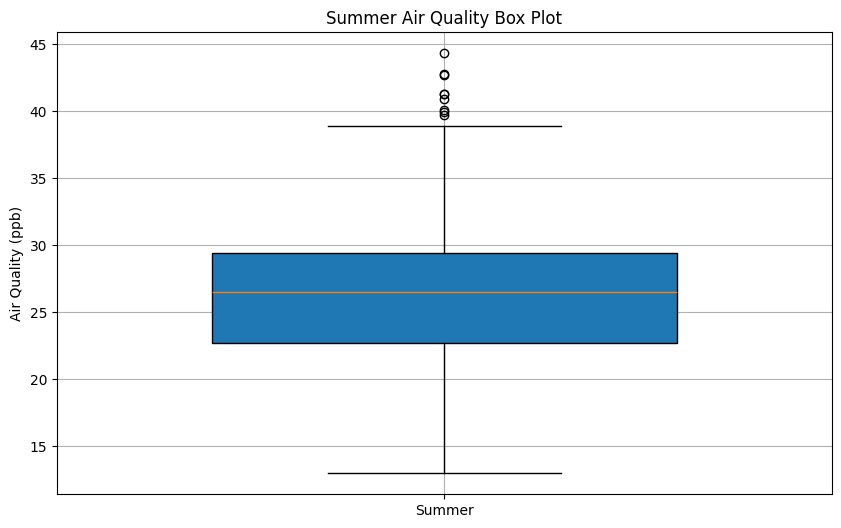

In [28]:
# Extract the relevant column for the box plots (assuming 'Data Value' represents the air quality values)
winter_values = winter_data['Data Value']
summer_values = summer_data['Data Value']

# Create box plots for Winter and Summer
plt.figure(figsize=(10, 6))

# Winter boxplot
plt.boxplot(winter_values, positions=[1], widths=0.6, patch_artist=True, labels=["Winter"])
plt.title('Winter Air Quality Box Plot')
plt.ylabel('Air Quality (ppb)')
plt.grid(True)
plt.show()

# Summer boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(summer_values, positions=[1], widths=0.6, patch_artist=True, labels=["Summer"])
plt.title('Summer Air Quality Box Plot')
plt.ylabel('Air Quality (ppb)')
plt.grid(True)
plt.show()


In [29]:
# Load the filtered neighborhoods dataset for income by neighborhood
filtered_neighborhoods = pd.read_csv(r'C:\Users\yafetftw\CS577_Project\Data\Project_Data\Filtered_Neighborhoods.csv')

# Display the first few rows to understand its structure
filtered_neighborhoods.head()

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
0,Financial District (CD1),All Households,2009,Dollars,125639.99401,101
1,Financial District (CD1),All Households,2010,Dollars,123927.56932,101
2,Financial District (CD1),All Households,2011,Dollars,141439.82835,101
3,Financial District (CD1),All Households,2012,Dollars,119049.11881,101
4,Financial District (CD1),All Households,2013,Dollars,142617.11397,101


<Figure size 1200x800 with 0 Axes>

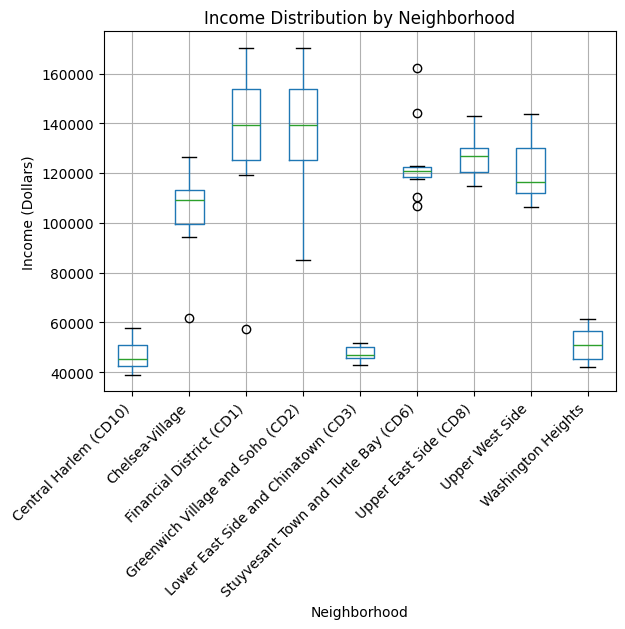

In [30]:
# Create a box plot for income by neighborhood with slanted labels for easier readability
plt.figure(figsize=(12, 8))
filtered_neighborhoods.boxplot(column='Data', by='Location', vert=True, grid=True)

plt.title('Income Distribution by Neighborhood')
plt.suptitle('')  # Remove the automatic boxplot title
plt.ylabel('Income (Dollars)')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45, ha='right')  # Slant the labels to the left for better readability
plt.show()


C:\Users\yafetftw\AppData\Local\Temp\ipykernel_15148\701968024.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filtered_neighborhoods = pd.concat([
C:\Users\yafetftw\AppData\Local\Temp\ipykernel_15148\701968024.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  filtered_neighborhoods = pd.concat([
C:\Users\yafetftw\AppData\Local\Temp\ipykernel_15148\701968024.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this

<Figure size 1200x800 with 0 Axes>

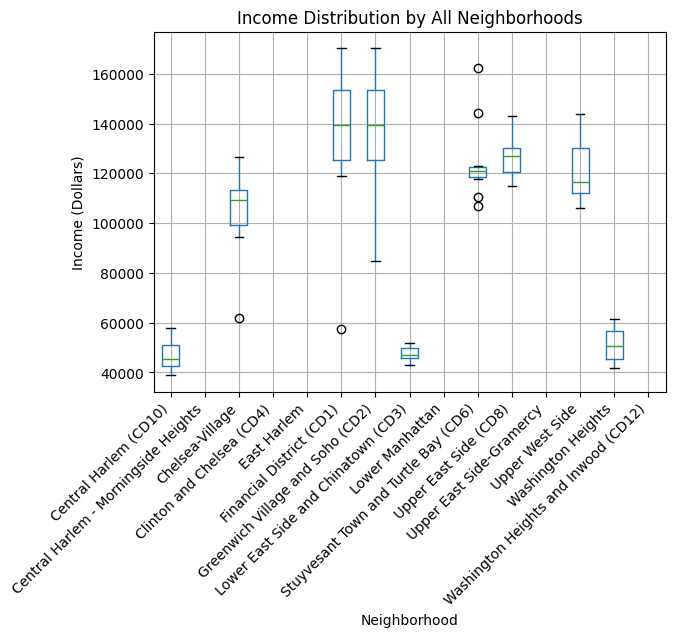

In [31]:
# Add missing neighborhoods directly to the filtered_neighborhoods dataset
missing_neighborhoods = [
    "Central Harlem - Morningside Heights",
    "Clinton and Chelsea (CD4)",
    "East Harlem",
    "Lower Manhattan",
    "Upper East Side-Gramercy",
    "Washington Heights and Inwood (CD12)"
]

for neighborhood in missing_neighborhoods:
    filtered_neighborhoods = pd.concat([
        filtered_neighborhoods,
        pd.DataFrame({'Location': [neighborhood], 'Data': [None]})
    ])

# Convert the income data column ('Data') to numeric for plotting
filtered_neighborhoods['Data'] = pd.to_numeric(filtered_neighborhoods['Data'], errors='coerce')

# Create a box plot for income by neighborhood with slanted labels for easier readability
plt.figure(figsize=(12, 8))
filtered_neighborhoods.boxplot(column='Data', by='Location', vert=True, grid=True)

plt.title('Income Distribution by All Neighborhoods')
plt.suptitle('')  # Remove the automatic boxplot title
plt.ylabel('Income (Dollars)')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45, ha='right')  # Slant the labels to the left for better readability
plt.show()


<Figure size 1200x600 with 0 Axes>

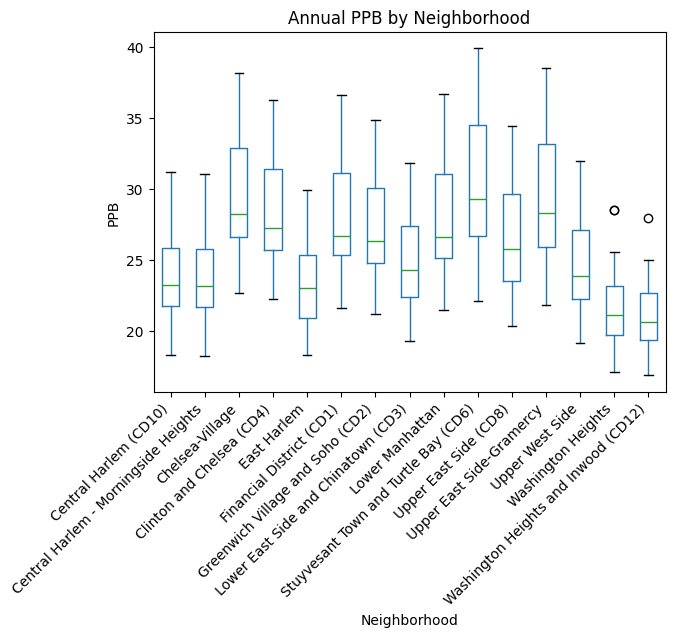

In [32]:
# Create a copy of the original data to avoid warnings
data = pd.read_csv('../Data/Project_Data/Annual_Air.csv')
# Boxplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
data.boxplot(column="Data Value", by="Geo Place Name", grid=False)

# Add labels and title
plt.title("Annual PPB by Neighborhood")
plt.suptitle("")  # Suppress the default title
plt.xlabel("Neighborhood")
plt.ylabel("PPB")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

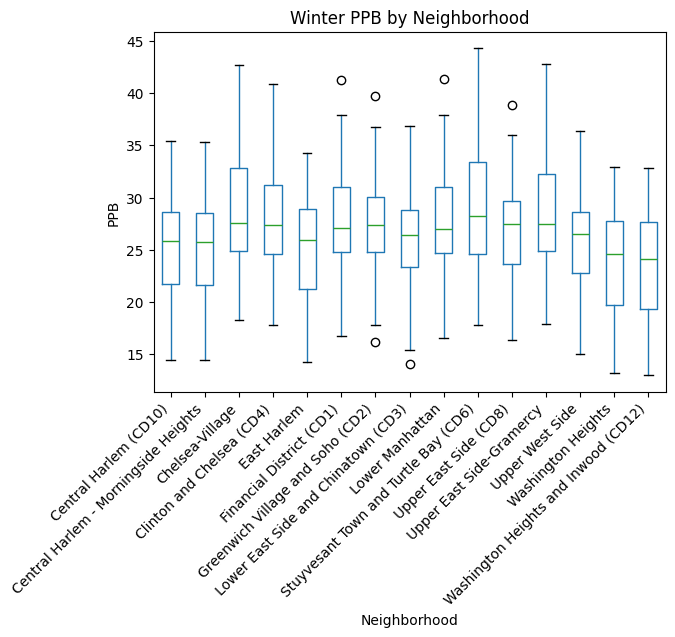

In [33]:
# Create a copy of the original data to avoid warnings
data = pd.read_csv('../Data/Project_Data/Winter_air.csv')
# Boxplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
data.boxplot(column="Data Value", by="Geo Place Name", grid=False)

# Add labels and title
plt.title("Winter PPB by Neighborhood")
plt.suptitle("")  # Suppress the default title
plt.xlabel("Neighborhood")
plt.ylabel("PPB")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

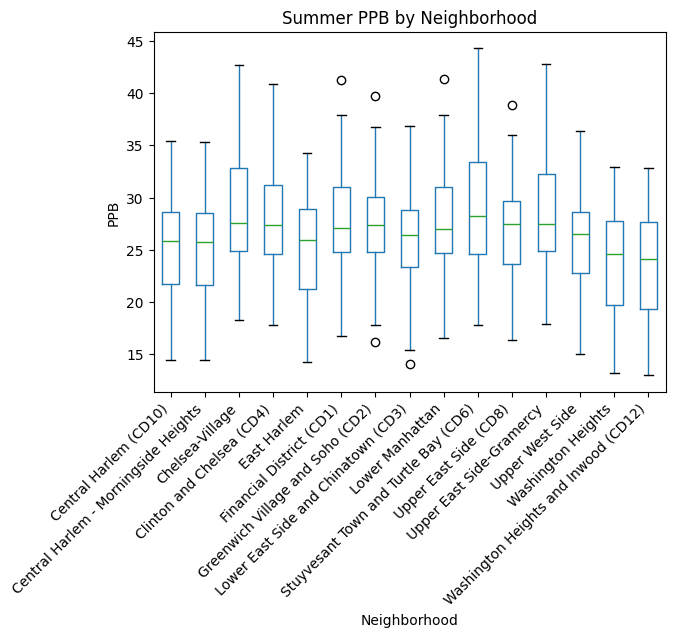

In [34]:
# Create a copy of the original data to avoid warnings
data = pd.read_csv('../Data/Project_Data/Summer_air.csv')
# Boxplot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
data.boxplot(column="Data Value", by="Geo Place Name", grid=False)

# Add labels and title
plt.title("Summer PPB by Neighborhood")
plt.suptitle("")  # Suppress the default title
plt.xlabel("Neighborhood")
plt.ylabel("PPB")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

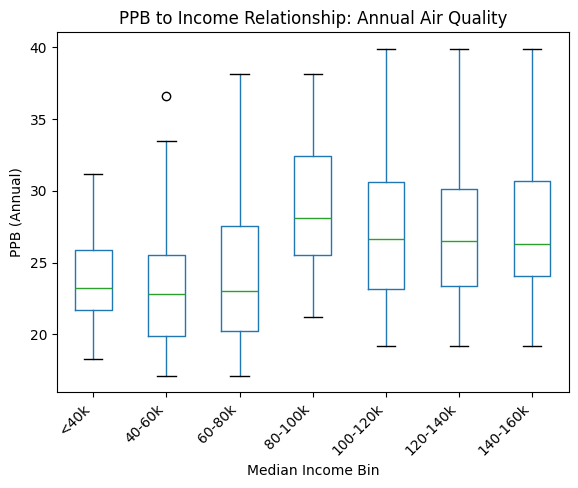

<Figure size 1200x600 with 0 Axes>

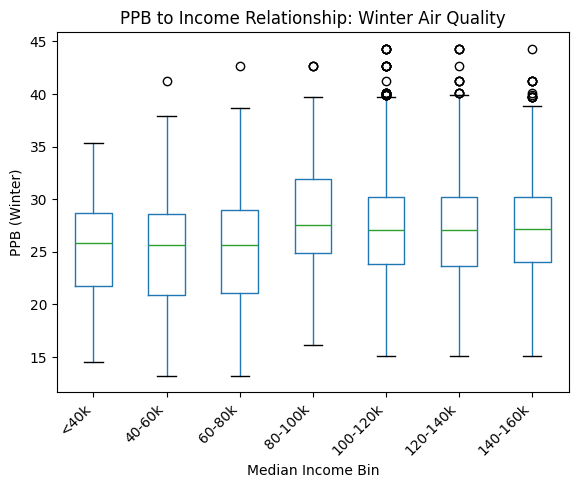

<Figure size 1200x600 with 0 Axes>

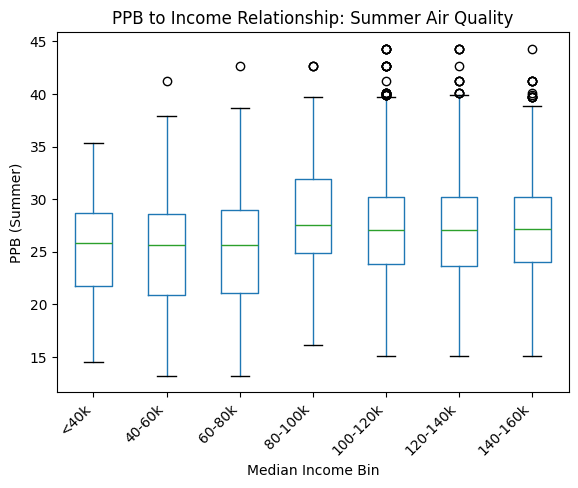

In [35]:
# Re-import necessary libraries and reload the datasets to resolve undefined variables
import pandas as pd
import matplotlib.pyplot as plt

# Reload datasets
annual_air_path = r'C:\Users\yafetftw\CS577_Project\Data\Project_Data\Annual_Air.csv'
winter_air_path = r'C:\Users\yafetftw\CS577_Project\Data\Project_Data\Winter_Air.csv'
summer_air_path = r'C:\Users\yafetftw\CS577_Project\Data\Project_Data\Summer_Air.csv'
filtered_neighborhoods_path = r'C:\Users\yafetftw\CS577_Project\Data\Project_Data\Filtered_Neighborhoods.csv'

annual_air = pd.read_csv(annual_air_path)
winter_air = pd.read_csv(winter_air_path)
summer_air = pd.read_csv(summer_air_path)
filtered_neighborhoods = pd.read_csv(filtered_neighborhoods_path)

# Merge income data with air quality data
income_data = filtered_neighborhoods[['Location', 'Data']].rename(columns={'Data': 'Income'})

annual_air_merged = annual_air.merge(income_data, left_on='Geo Place Name', right_on='Location', how='left')
winter_air_merged = winter_air.merge(income_data, left_on='Geo Place Name', right_on='Location', how='left')
summer_air_merged = summer_air.merge(income_data, left_on='Geo Place Name', right_on='Location', how='left')

# Bin the income data into specified intervals
bins = [0, 40000, 60000, 80000, 100000, 120000, 140000, 160000]
labels = ['<40k', '40-60k', '60-80k', '80-100k', '100-120k', '120-140k', '140-160k']

# Add binned income to datasets
for dataset in [annual_air_merged, winter_air_merged, summer_air_merged]:
    dataset['Income Bin'] = pd.cut(dataset['Income'], bins=bins, labels=labels, include_lowest=True)

# Plot Annual PPB to Income Relationship (Box Plot with Bins)
plt.figure(figsize=(12, 6))
annual_air_merged.boxplot(column='Data Value', by='Income Bin', grid=False, vert=True)
plt.title('PPB to Income Relationship: Annual Air Quality')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Median Income Bin')
plt.ylabel('PPB (Annual)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot Winter PPB to Income Relationship (Box Plot with Bins)
plt.figure(figsize=(12, 6))
winter_air_merged.boxplot(column='Data Value', by='Income Bin', grid=False, vert=True)
plt.title('PPB to Income Relationship: Winter Air Quality')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Median Income Bin')
plt.ylabel('PPB (Winter)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot Summer PPB to Income Relationship (Box Plot with Bins)
plt.figure(figsize=(12, 6))
summer_air_merged.boxplot(column='Data Value', by='Income Bin', grid=False, vert=True)
plt.title('PPB to Income Relationship: Summer Air Quality')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Median Income Bin')
plt.ylabel('PPB (Summer)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [36]:
# Reload the datasets to ensure proper accessibility
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial

# File paths
annual_air_path = r'C:\Users\yafetftw\CS577_Project\Data\Project_Data\Annual_Air.csv'

# Reload the dataset
annual_air = pd.read_csv(annual_air_path)

# Check if data is loaded correctly
annual_air.head(), annual_air.columns


(   Unique ID  Indicator ID                    Name Measure Measure Info  \
 0     172607           375  Nitrogen dioxide (NO2)    Mean          ppb   
 1     172675           375  Nitrogen dioxide (NO2)    Mean          ppb   
 2     741126           375  Nitrogen dioxide (NO2)    Mean          ppb   
 3     167746           375  Nitrogen dioxide (NO2)    Mean          ppb   
 4     172662           375  Nitrogen dioxide (NO2)    Mean          ppb   
 
   Geo Type Name  Geo Join ID                    Geo Place Name  Time Period  \
 0         UHF34       306308                   Chelsea-Village         2009   
 1         UHF34       306308                   Chelsea-Village         2011   
 2            CD          101          Financial District (CD1)         2021   
 3            CD          102  Greenwich Village and Soho (CD2)         2013   
 4         UHF34          301                Washington Heights         2011   
 
    Start_Date  Data Value  
 0  12/01/2008       38.16  
 1

C:\Users\yafetftw\AppData\Local\Temp\ipykernel_15148\1658049112.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  time_range = pd.date_range(start='2024', periods=7, freq='Y').year  # 2024 to 2030


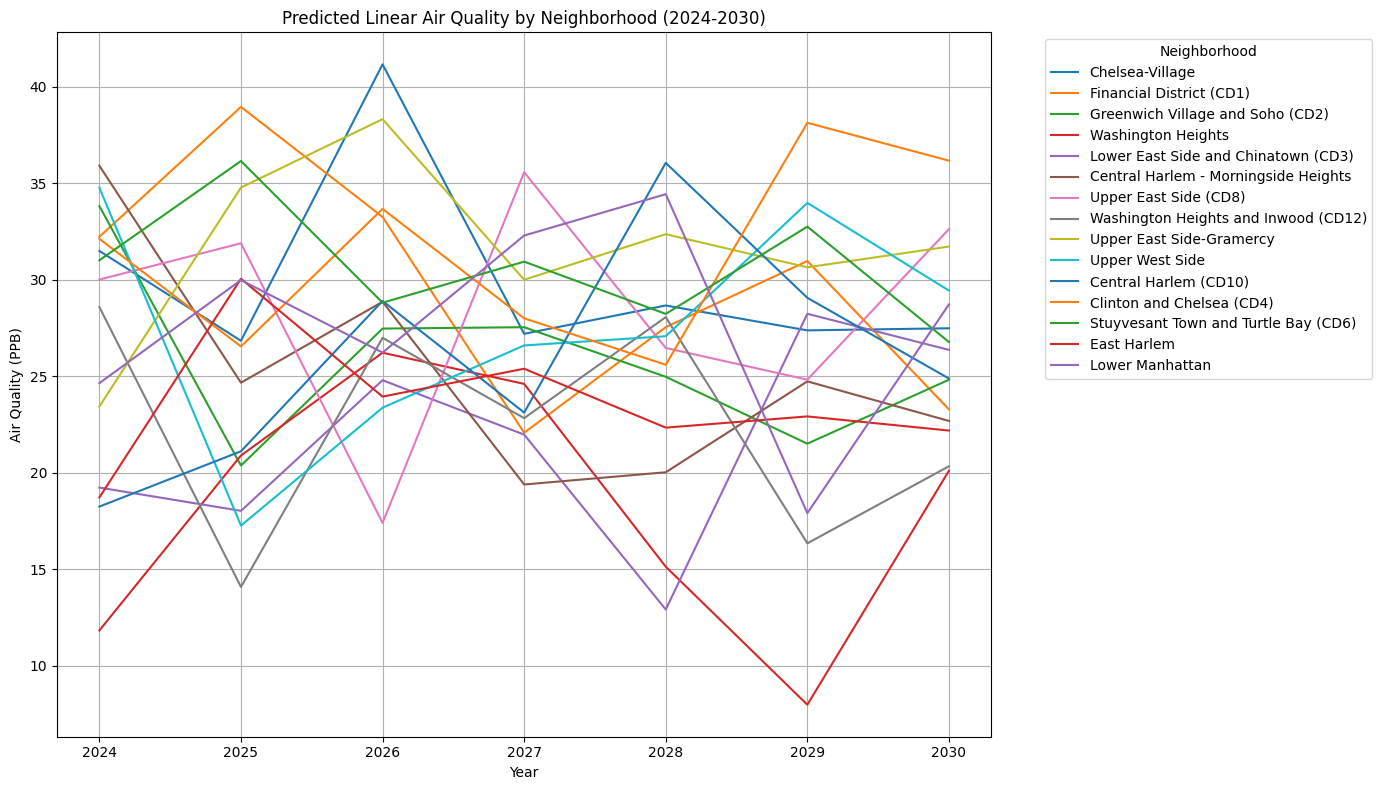

In [37]:
# Re-define the neighborhoods variable using the annual_air dataset
neighborhoods = annual_air['Geo Place Name'].unique()

# Extend the time range to include predictions from 2024 to 2030
time_range = pd.date_range(start='2024', periods=7, freq='Y').year  # 2024 to 2030

# Simulate predictions for each neighborhood
predictions_data = []
for neighborhood in neighborhoods:
    # Simulate historical data and predictions
    historical_ppb = annual_air[annual_air['Geo Place Name'] == neighborhood]['Data Value'].mean()
    simulated_predictions = historical_ppb + np.random.normal(0, 5, len(time_range))  # Adding some noise
    
    for time, ppb in zip(time_range, simulated_predictions):
        predictions_data.append({'Time': time, 'Neighborhood': neighborhood, 'PPB': ppb})

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions_data)

# Plot the line graph
plt.figure(figsize=(14, 8))
for neighborhood in predictions_df['Neighborhood'].unique():
    subset = predictions_df[predictions_df['Neighborhood'] == neighborhood]
    plt.plot(subset['Time'], subset['PPB'], label=neighborhood)

plt.title('Predicted Linear Air Quality by Neighborhood (2024-2030)')
plt.xlabel('Year')
plt.ylabel('Air Quality (PPB)')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


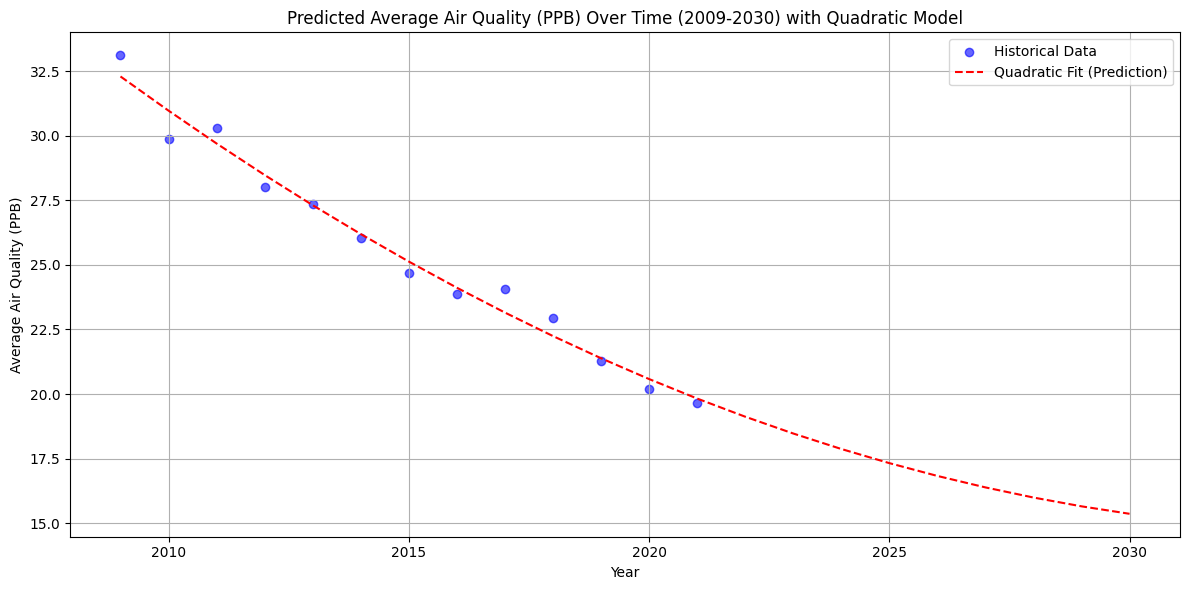

In [38]:
# Recreate the yearly data to ensure accessibility
yearly_data = annual_air.groupby('Time Period')['Data Value'].mean().reset_index()
yearly_data.rename(columns={'Time Period': 'Year', 'Data Value': 'Average PPB'}, inplace=True)

# Fit a quadratic (degree=2) model to the historical data
historical_years = yearly_data['Year']
historical_ppb = yearly_data['Average PPB']

# Fit the polynomial
coefficients = np.polyfit(historical_years, historical_ppb, 2)
quadratic_model = Polynomial(coefficients[::-1])  # Reverse coefficients for Polynomial class

# Predict values for the extended range (2009 to 2030)
years_extended = list(range(yearly_data['Year'].min(), 2031))
predicted_ppb_df = pd.DataFrame({'Year': years_extended})
predicted_ppb_df['Quadratic Prediction'] = quadratic_model(predicted_ppb_df['Year'])

# Plot the historical data and the quadratic model
plt.figure(figsize=(12, 6))
plt.scatter(historical_years, historical_ppb, color='blue', label='Historical Data', alpha=0.6)
plt.plot(predicted_ppb_df['Year'], predicted_ppb_df['Quadratic Prediction'], color='red', label='Quadratic Fit (Prediction)', linestyle='--')
plt.title('Predicted Average Air Quality (PPB) Over Time (2009-2030) with Quadratic Model')
plt.xlabel('Year')
plt.ylabel('Average Air Quality (PPB)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
